In [1]:
from mdr_analysis_utils import *

In [13]:
naming_dict = {
    'hardrep__min__5': 'Hardrep w/ minimization',
    'hardrep__nomin__5': 'Hardrep w/o minimization',
    'softrep__min__5': 'Softrep w/ minimization',
    'softrep__nomin__5': 'Softrep w/o minimization'
}

In [2]:
"""
Processes what files you're interested in.

For this to work you must supply the directory and conditions.
The directory will be:

[protein_name]_[(softrep or hardrep)]_[(min or nomin)]_results

Within each, the results are all named the same:
protein_dimer.npz, protein_monomer.npz
"""

"\nProcesses what files you're interested in.\n\nFor this to work you must supply the directory and conditions.\nThe directory will be:\n\n[protein_name]_[(softrep or hardrep)]_[(min or nomin)]_results\n\nWithin each, the results are all named the same:\nprotein_dimer.npz, protein_monomer.npz\n"

In [20]:
print(protein_dict)

{'bcov_v3_r3_ems_3hC_436_0002_000000017_0001_0001_47_64_H_.._ems_p1-15H-GBL-16H-GABBL-16H_0382_0001_0001_0001_0001_0001_0001_0001_0001': 'IL-7ra', 'Motif1400_ems_3hM_482_0001_7396_0001': 'FGFR2', 'ems_3hC_1642_000000001_0001': 'VirB8', 'longxing_CationpiFixed_HHH_eva_0229_000000001_0001_0001': 'TrkA', 'NewR1_ems_ferrM_2623_0002_000000011_0001_0001_0004_crosslinked_1': 'CD3_delta'}


In [26]:
protein = list(protein_dict.keys())[0]
minimized = True
hardrep = True

In [27]:
print(f'We are analyzing results for {protein_dict.get(protein)}, Minimized? {minimized}, hardrep? {hardrep}')

We are analyzing results for IL-7ra, Minimized? True, hardrep? True


In [28]:
if minimized:
    
    if hardrep:
        results_dir = f'/Users/owenrogers/PycharmProjects/all_scripts/FEP/results/per_protein/{protein}__hardrep__min__5'
        file_name = f'{protein}_hardrep_min_heatmap'
        run_name = 'hardrep__min__5'
    else:
        results_dir = f'/Users/owenrogers/PycharmProjects/all_scripts/FEP/results/per_protein/{protein}__softrep__min__5'
        file_name = f'{protein}_softrep_min_heatmap'
        run_name = 'softrep__min__5'
    
else:
    
    if hardrep:
        results_dir = f'/Users/owenrogers/PycharmProjects/all_scripts/FEP/results/per_protein/{protein}__hardrep__nomin__5'  
        file_name = f'{protein}_hardrep_nomin_heatmap'
        run_name = 'hardrep__nomin__5'
    else:
        results_dir = f'/Users/owenrogers/PycharmProjects/all_scripts/FEP/results/per_protein/{protein}__softrep__nomin__5'
        file_name = f'{protein}_softrep_nomin_heatmap'
        run_name = 'softrep__nomin__5'
        
# and then it's all {protein}_dimer or {protein}_monomer for the .npz files

In [29]:
print(results_dir)
print('')
print(file_name)
print('')
print(run_name)

/Users/owenrogers/PycharmProjects/all_scripts/FEP/results/per_protein/bcov_v3_r3_ems_3hC_436_0002_000000017_0001_0001_47_64_H_.._ems_p1-15H-GBL-16H-GABBL-16H_0382_0001_0001_0001_0001_0001_0001_0001_0001__hardrep__min__5

bcov_v3_r3_ems_3hC_436_0002_000000017_0001_0001_47_64_H_.._ems_p1-15H-GBL-16H-GABBL-16H_0382_0001_0001_0001_0001_0001_0001_0001_0001_hardrep_min_heatmap

hardrep__min__5


In [30]:
# set input files

protein_pdb = f'/Users/owenrogers/PycharmProjects/all_scripts/FEP/natives/{protein}.pdb'

monomer_seq = get_sequence(protein_pdb)
dimer_seq = get_sequence(protein_pdb)

assert monomer_seq == dimer_seq   

┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python312.Release 2024.39+release.59628fbc5bc09f1221e1642f1f8d157ce49b1410 2024-09-23T07:49:48] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.conda.m1.cxx11thread.serialization.pyth

In [31]:
dimer_npz = f'{results_dir}/{protein}__{run_name}__dimer.npz'
monomer_npz = f'{results_dir}/{protein}__{run_name}__monomer.npz'

In [32]:
heatmap, label, ddg_data = fill_heatmap(f'/Users/owenrogers/PycharmProjects/all_scripts/FEP/sequences/{protein}.seq', f'{results_dir}/{protein}.seq', dimer_npz, monomer_npz)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/owenrogers/PycharmProjects/all_scripts/FEP/results/per_protein/bcov_v3_r3_ems_3hC_436_0002_000000017_0001_0001_47_64_H_.._ems_p1-15H-GBL-16H-GABBL-16H_0382_0001_0001_0001_0001_0001_0001_0001_0001__hardrep__min__5/bcov_v3_r3_ems_3hC_436_0002_000000017_0001_0001_47_64_H_.._ems_p1-15H-GBL-16H-GABBL-16H_0382_0001_0001_0001_0001_0001_0001_0001_0001.seq'

In [33]:
title = f'{protein_dict.get(protein)} for {naming_dict.get(run_name)}'

In [15]:
print(title)

IL-7ra for Softrep w/ minimization


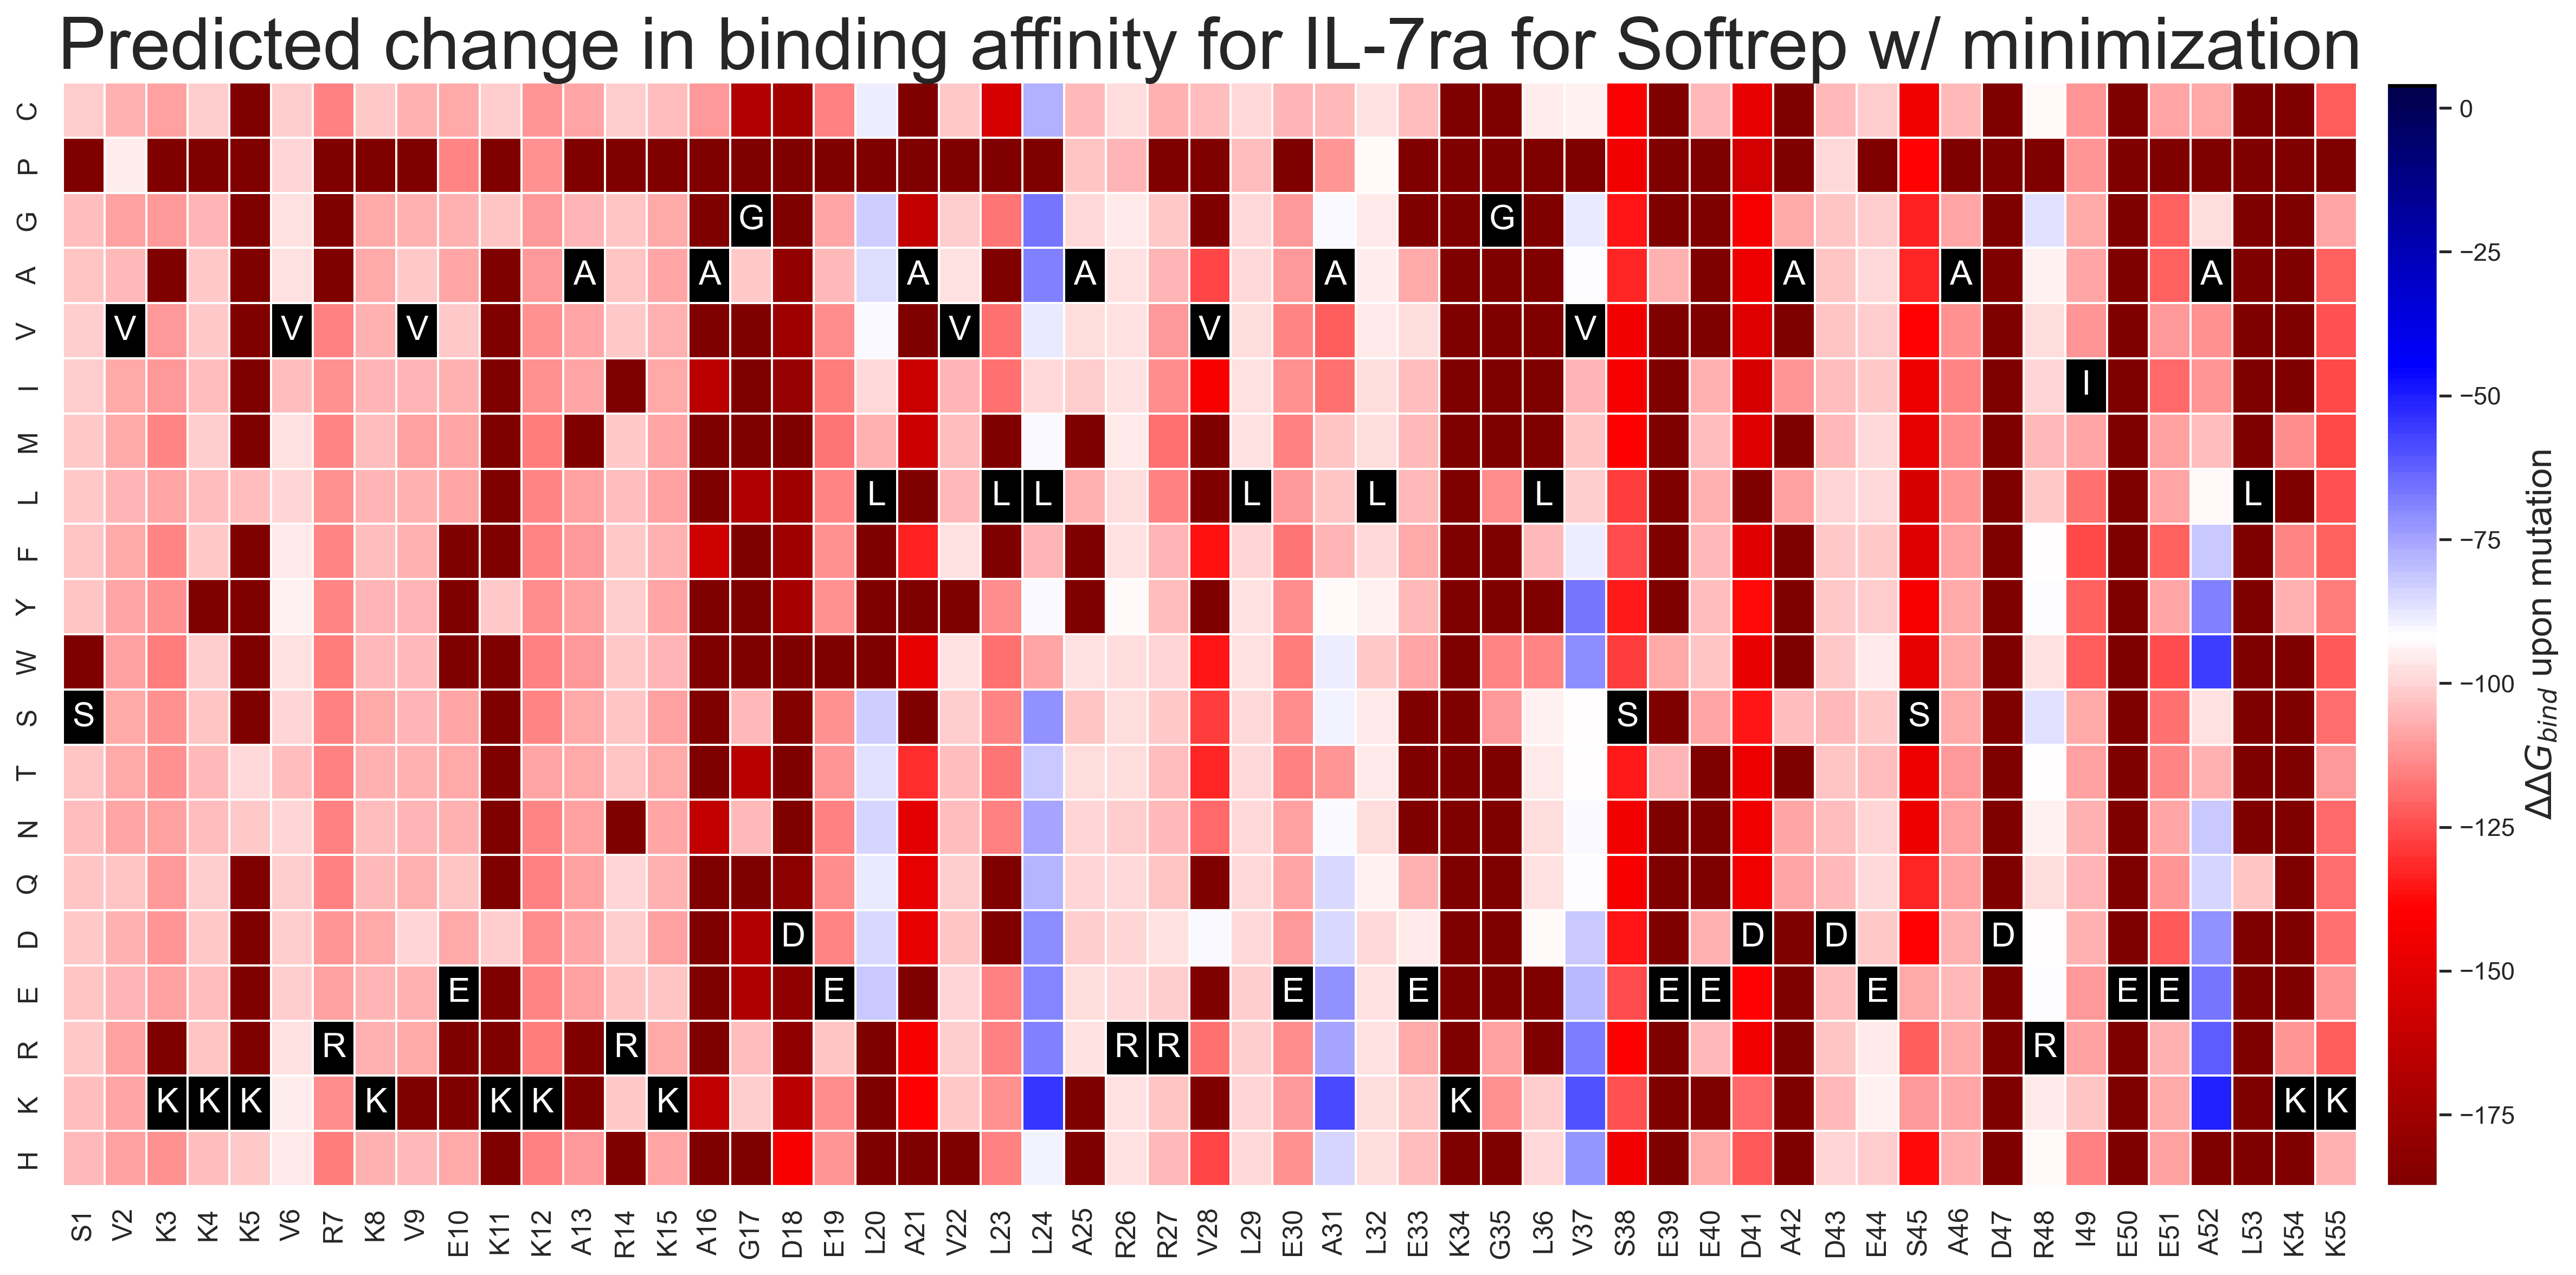

In [16]:
plot_heatmap(heatmap, title, label, ddg_data, save_name=file_name)